In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline


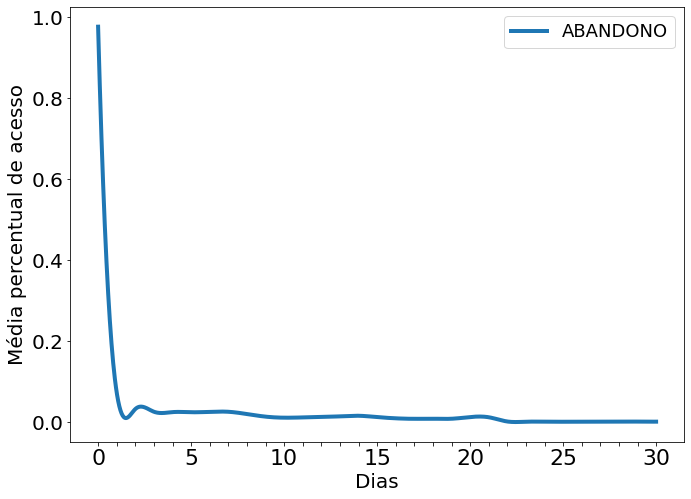

In [2]:
dataset_original = pd.read_csv('data/sei.csv')
logs = pd.read_csv('logs/out/course_only/logs-completo.csv')
n_dias = [1,31]

dataset = dataset_original.merge(logs, how='left', left_on='id_inscricao', right_on='id_inscricao')

dataset[dataset['sit_matricula'] == 'REPROVADO'].filter(like='acesso_dia_')
dataset = dataset.replace({"CERTIFICADO": "APROVADO", "CANC_DESISTENTE": "TRANCAMENTO"})

kmeans_df1 = dataset[["sit_matricula",*[f'acesso_dia_{n}' for n in range(31)]]]
kmeans_df1.groupby("sit_matricula").aggregate('mean')
kmeans_df = kmeans_df1.dropna()


y = kmeans_df[kmeans_df['sit_matricula'] == "ABANDONO"].aggregate('mean').to_numpy()
x_new = np.linspace(0, 30, 1000)
a_BSpline = make_interp_spline([j for j in range(31)], y)
y_new = a_BSpline(x_new)
plt.plot(x_new, y_new, linewidth=4)
    
    
plt.legend(['ABANDONO'], fontsize=18)
lgd = [i if i in [0, 5, 10, 15, 20, 25, 30] else "" for i in range(31)]
plt.xticks([i for i in range(31)], lgd, fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Dias", fontsize=20)
plt.ylabel("Média percentual de acesso", fontsize=20)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.show()

APROVADO
ABANDONO
TRANCAMENTO
REPROVADO


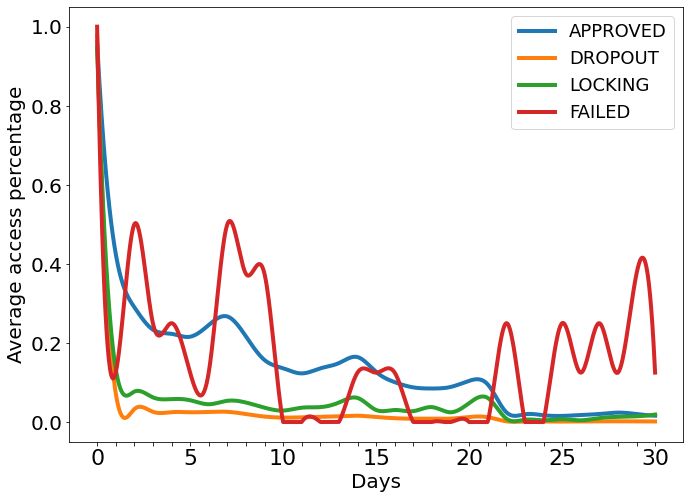

In [3]:
dataset_original = pd.read_csv('data/sei.csv')
logs = pd.read_csv('logs/out/course_only/logs-completo.csv')
n_dias = [1,31]

legends = ['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE']
dataset = dataset_original.merge(logs, how='left', left_on='id_inscricao', right_on='id_inscricao')

dataset[dataset['sit_matricula'] == 'REPROVADO'].filter(like='acesso_dia_')
dataset = dataset.replace({"CERTIFICADO": "APROVADO", "CANC_DESISTENTE": "TRANCAMENTO"})

kmeans_df1 = dataset[["sit_matricula",*[f'acesso_dia_{n}' for n in range(31)]]]
kmeans_df1.groupby("sit_matricula").aggregate('mean')
kmeans_df = kmeans_df1.dropna()



for i in range(4):
    print(legends[i])
    y = kmeans_df[kmeans_df['sit_matricula'] == legends[i]].aggregate('mean').to_numpy()
    x_new = np.linspace(0, 30, 1000)
    a_BSpline = make_interp_spline([j for j in range(31)], y)
    y_new = a_BSpline(x_new)
    y_new = [value if value >=0 else 0 for value in y_new]
    plt.plot(x_new, y_new, linewidth=4)
    
    
plt.legend(['APPROVED', 'DROPOUT', 'LOCKING', 'FAILED'], fontsize=18)
lgd = [i if i in [0, 5, 10, 15, 20, 25, 30] else "" for i in range(31)]
plt.xticks([i for i in range(31)], lgd, fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Days", fontsize=20)
plt.ylabel("Average access percentage", fontsize=20)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.show()


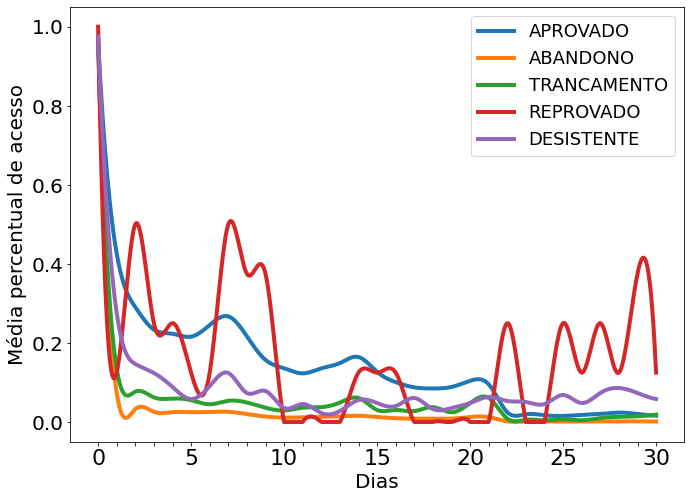

In [4]:
dataset_original = pd.read_csv('data/sei.csv')
logs = pd.read_csv('logs/out/logs-completo.csv')
n_dias = [1,31]

legends = ['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE']
dataset = dataset_original.merge(logs, how='left', left_on='id_inscricao', right_on='id_inscricao')

dataset[dataset['sit_matricula'] == 'REPROVADO'].filter(like='acesso_dia_')
dataset = dataset.replace({"CERTIFICADO": "APROVADO", "CANC_DESISTENTE": "TRANCAMENTO"})

kmeans_df1 = dataset[["sit_matricula",*[f'acesso_dia_{n}' for n in range(31)]]]
kmeans_df1.groupby("sit_matricula").aggregate('mean')
kmeans_df = kmeans_df1.dropna()



for i in range(5):
    y = kmeans_df[kmeans_df['sit_matricula'] == legends[i]].aggregate('mean').to_numpy()
    x_new = np.linspace(0, 30, 1000)
    
    a_BSpline = make_interp_spline([j for j in range(31)], y)
    y_new = a_BSpline(x_new)
    y_new = [value if value >=0 else 0 for value in y_new]
    plt.plot(x_new, y_new, linewidth=4)
    
    
plt.legend(['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE'], fontsize=18)
lgd = [i if i in [0, 5, 10, 15, 20, 25, 30] else "" for i in range(31)]
plt.xticks([i for i in range(31)], lgd, fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Dias", fontsize=20)
plt.ylabel("Média percentual de acesso", fontsize=20)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.show()

In [5]:
dataset_original = pd.read_csv('data/sei.csv')
logs = pd.read_csv('logs/out/course_only/logs-completo.csv')
n_dias = [1,31]


dataset = dataset_original.merge(logs, how='left', left_on='id_inscricao', right_on='id_inscricao')

notas_maximas_a_remover = dataset.filter(like='nota_maxima_atividade')


# Filtramos também alguns índices e id's que não serão necessários no momento
indices_e_ids_a_remover = [
     "id_inscricao", 
     "id_oferta_x", 
     "id_curso", 
     "qt_carga_horaria_oferta",
     "qt_duracao_dias",
     "id_pessoa",
     "nota_maxima_curso",
     "tx_nome_orgao"
]

# E também algumas datas que podem não ser muito úteis num momento inicial
datas_a_remover = [
    "dt_fim_inscricao",
    "dt_nascimento"
]

dataset = dataset.drop(
    [*indices_e_ids_a_remover, *datas_a_remover,  *list(notas_maximas_a_remover), "nota_final_aluno_curso", "data_termino_curso_aluno"], 
    axis=1
)

# E iremos alterar os valores do 'sit_matricula'
dataset = dataset.replace({"CERTIFICADO": "APROVADO", "CANC_DESISTENTE": "TRANCAMENTO"})

# Preenchemos todos as entradas com  '2000-01-01 00:00' no lugar de 'nan' 
def insert_default_date_time(dataset):
    datas_a_inserir = dataset.filter(like='data_entrega_atividade_')
    datas_a_inserir = datas_a_inserir.fillna(pd.to_datetime("2000-01-01 00:00:00"))
    dataset.fillna(datas_a_inserir, inplace=True)
    return dataset

# Convertemos os campos de datas em date_times:
def convert_columns_to_date_time(dataset, columns_name):
    date_time_columns = pd.to_datetime(dataset[[*columns_name]].stack(), dayfirst=True)
    date_time_columns = date_time_columns.dt.normalize()
    dataset[[*columns_name]] = date_time_columns.unstack()
    return dataset


dataset = insert_default_date_time(dataset)

date_columns = [*list(dataset.filter(like='data_entrega_atividade_')), "dt_inscricao"]

dataset = convert_columns_to_date_time(dataset, date_columns)

# Criamos uma função que irá fazer esse cálculo e retornar um dataframe com as novas colunas
def calculate_dates_between(df_initial_date, df_list_of_dates, columns_name):
    # Geramos um novo dataframe que irá comportar as diferenças entre as datas
    df_dates_between = pd.DataFrame()

    # Fazemos o calculo das diferenãs entre datas, inserindo no dataframe criado acima
    for index, item in enumerate(df_list_of_dates):
        df_dates_between[f'{columns_name}_{index+1}'] = (df_list_of_dates[item] - df_initial_date).dt.days
    
    # E setamos todos os valores < 0  = -1
    df_dates_between = df_dates_between.clip(lower=-1)

    return df_dates_between

initial_date = dataset["dt_inscricao"]
list_of_dates = dataset.filter(like='data_entrega_atividade_')

dif_between_dates = calculate_dates_between(
    initial_date, 
    list_of_dates, 
    columns_name='dias_atividade',
)

# Por fim, inserimos essas novas colunas no nosso df_filtrado:
dataset[[*list(dif_between_dates)]] = dif_between_dates
dataset = dataset.drop([*list_of_dates.columns], axis=1)

def populate_by_range_days(dataset, n_dias, column_name = 'atividades_ate_dia_'):
    for i in range(*n_dias):
        dias_atividades = dataset.filter(like="dias_atividade")
        dias_atividades = dias_atividades[(dias_atividades <= i) & (dias_atividades != -1)].replace({0: True})
        dias_atividades = dias_atividades.fillna(False)
        dias_atividades = dias_atividades.astype('bool')
        dataset[f"atividades_ate_dia_{i}"] = dias_atividades.sum(axis=1)
    return dataset


dataset = populate_by_range_days(dataset, n_dias=n_dias)

"""
Como a data de inscrição já não importa mais, iremos remover ela também.
"""
dataset = dataset.drop("dt_inscricao", axis=1)

#Para as notas, podemos assumir que valores nulos são atividades não feitas. dessas forma:
dataset[dataset.filter(like='nota_aluno_atividade').columns] = dataset.filter(like='nota_aluno_atividade').fillna(0)

# Para as demais simplesmente inserimos 'sem_{}'
dataset['sg_uf'] = dataset['sg_uf'].fillna('sem_uf')
dataset['tp_poder_execut_legisl_judic'] = dataset['tp_poder_execut_legisl_judic'].fillna('sem_tp_poder')
dataset['esfera'] = dataset['esfera'].fillna('sem_esfera')
dataset['sg_pais'] = dataset['sg_pais'].fillna('sem_pais')

# Removo todas as linhas que não possuem valores nas colunas de acesso até determinado dia
dataset = dataset.dropna(subset=[f'acesso_dia_{n}' for n in range(31)])


matricula = dataset['sit_matricula']

columns_to_encode = [
    'sg_uf', 
    'tp_sexo', 
    'sg_pais', 
    'sit_matricula',
    'tp_servidor_militar_cidadao',
    'tp_poder_execut_legisl_judic',
    'esfera'
]

def gnumeric_func (data, columns):
    data[columns] = data[columns].apply(lambda x: pd.factorize(x)[0])
    return data

dataset = gnumeric_func(dataset, columns_to_encode)

ohe_df = pd.DataFrame({"resultado": dataset['sit_matricula']})

dataset = pd.concat([dataset, ohe_df], axis=1)
resultados = dataset.filter(like="sit_matricula_")

dataset = dataset.drop(resultados, axis=1).dropna(subset=['resultado'])

In [6]:
dataset[dataset['resultado'] == 3]

,index,sg_uf,tp_sexo,sg_pais,sit_matricula,tp_servidor_militar_cidadao,tp_poder_execut_legisl_judic,esfera,nota_aluno_atividade_1,nota_aluno_atividade_2,...,atividades_ate_dia_22,atividades_ate_dia_23,atividades_ate_dia_24,atividades_ate_dia_25,atividades_ate_dia_26,atividades_ate_dia_27,atividades_ate_dia_28,atividades_ate_dia_29,atividades_ate_dia_30,resultado
47947,47947,1,0,1,3,3,1,0,100.0,100.0,...,18,18,18,18,18,18,18,18,18,3
65186,65186,0,0,1,3,0,0,0,100.0,100.0,...,8,8,8,8,8,11,12,18,18,3
65426,65426,0,0,1,3,0,3,0,60.0,0.0,...,16,16,16,16,16,16,16,18,18,3
65790,65790,0,0,1,3,2,1,0,80.0,100.0,...,18,18,18,18,18,18,18,18,18,3
67078,67078,0,0,1,3,0,0,0,60.0,40.0,...,0,0,0,1,1,1,1,1,18,3
67371,67371,0,0,1,3,2,1,0,20.0,40.0,...,18,18,18,18,18,18,18,18,18,3
69855,69855,9,1,1,3,3,1,0,20.0,0.0,...,18,18,18,18,18,18,18,18,18,3
69894,69894,1,1,1,3,3,1,0,100.0,40.0,...,18,18,18,18,18,18,18,18,18,3


In [7]:
def plot_clusters(df, query = "clusters", title="Dias por cluster",n_clusters=5, type="sum"):
    data_array = df.values    
    df.groupby(query).aggregate(type).plot.bar(figsize=(10,7.5))
    plt.title(title)

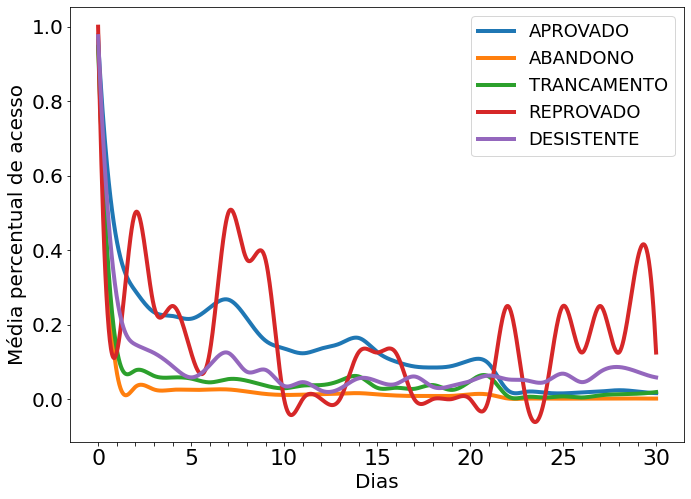

In [8]:
from scipy.interpolate import make_interp_spline, BSpline

kmeans_df = dataset[["resultado",*[f'acesso_dia_{n}' for n in range(31)]]]
kmeans_df.groupby("resultado").aggregate('mean')

for i in range(5):
    y = kmeans_df[kmeans_df['resultado'] == i].aggregate('mean').drop("resultado").to_numpy()
    x_new = np.linspace(0, 30, 1000)
    a_BSpline = make_interp_spline([j for j in range(31)], y)
    y_new = a_BSpline(x_new)
    plt.plot(x_new, y_new, linewidth=4)
    
    
plt.legend(['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE'], fontsize=18)
lgd = [i if i in [0, 5, 10, 15, 20, 25, 30] else "" for i in range(31)]
plt.xticks([i for i in range(31)], lgd, fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Dias", fontsize=20)
plt.ylabel("Média percentual de acesso", fontsize=20)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.show()

In [9]:
kmeans_df[kmeans_df['resultado'] == 3]

,resultado,acesso_dia_0,acesso_dia_1,acesso_dia_2,acesso_dia_3,acesso_dia_4,acesso_dia_5,acesso_dia_6,acesso_dia_7,acesso_dia_8,...,acesso_dia_21,acesso_dia_22,acesso_dia_23,acesso_dia_24,acesso_dia_25,acesso_dia_26,acesso_dia_27,acesso_dia_28,acesso_dia_29,acesso_dia_30
47947,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65186,3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
65426,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65790,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
67078,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
67371,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69855,3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69894,3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


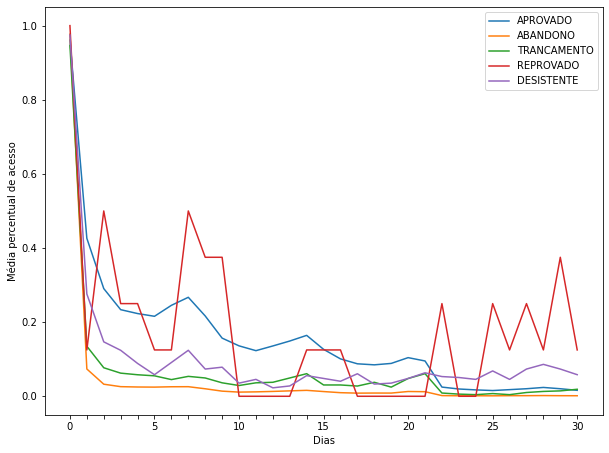

In [10]:
kmeans_df = dataset[["resultado",*[f'acesso_dia_{n}' for n in range(31)]]]
kmeans_df.groupby("resultado").aggregate('mean')
kmeans_df[kmeans_df['resultado'] == 0].aggregate('mean').drop("resultado").plot(kind="line", figsize=(10,7.5))
kmeans_df[kmeans_df['resultado'] == 1].aggregate('mean').drop("resultado").plot(kind="line")
kmeans_df[kmeans_df['resultado'] == 2].aggregate('mean').drop("resultado").plot(kind="line")
kmeans_df[kmeans_df['resultado'] == 3].aggregate('mean').drop("resultado").plot(kind="line")
kmeans_df[kmeans_df['resultado'] == 4].aggregate('mean').drop("resultado").plot(kind="line")
plt.legend(['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE'])
lgd = [i if i in [0, 5, 10, 15, 20, 25, 30] else "" for i in range(31)]
plt.xticks([i for i in range(31)], lgd)
plt.xlabel("Dias")
plt.ylabel("Média percentual de acesso")
plt.show()

In [11]:
acuracias_sem_log = pd.read_csv('data/acuracias_sem_logs.csv')
acuracias_com_log = pd.read_csv('data/acuracias_com_logs.csv')

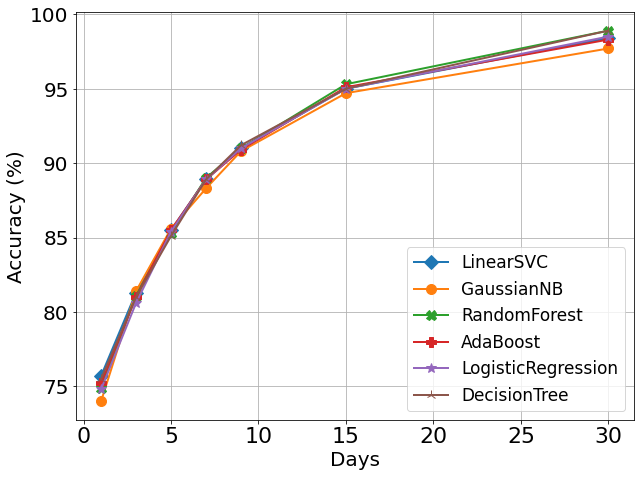

In [12]:
#plot_clusters(acuracias_sem_log, query="dias", title="Dias")
#acuracias_sem_log

ax = acuracias_sem_log.groupby("dias").aggregate('mean').plot(kind="line", figsize=(10,7.5), linewidth=2, ms=10)

markers = ["D", "o", "X", "P", "*", "2"]

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Days", fontsize=20)
plt.ylabel("Accuracy (%)", fontsize=20)
plt.legend(fontsize=17)
plt.grid(True)
plt.show()

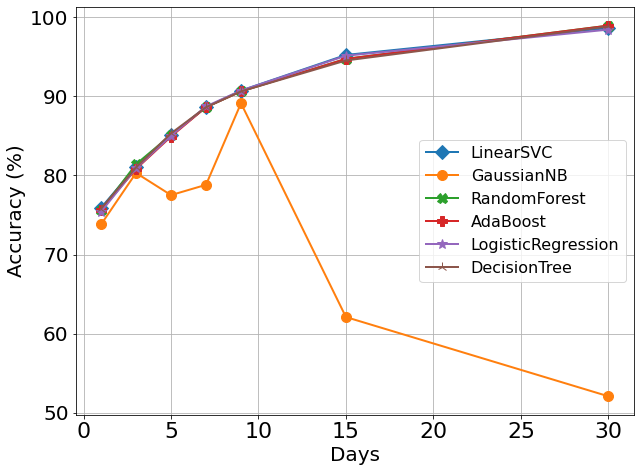

In [13]:
ax = acuracias_com_log.groupby("dias").aggregate('mean').plot(kind="line", figsize=(10,7.5), linewidth=2, ms=10)

markers = ["D", "o", "X", "P", "*", "2"]

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Days", fontsize=20)
plt.ylabel("Accuracy (%)", fontsize=20)
plt.legend(fontsize=16, loc="center right")
plt.grid(True)
plt.show()

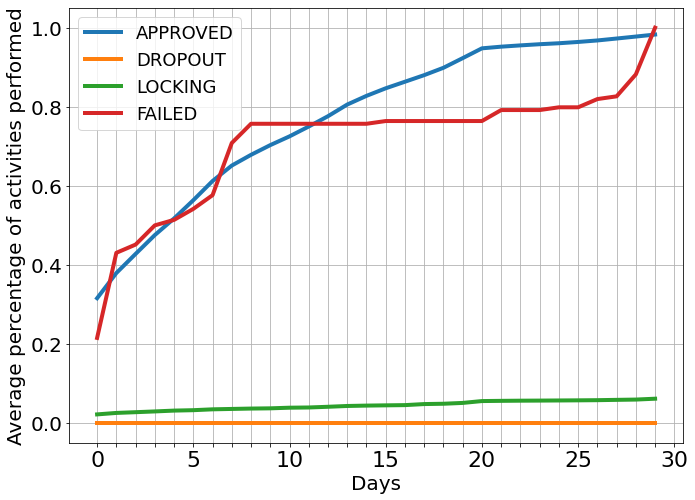

In [14]:
dataset[dataset['resultado'] == 0].filter(like=f'atividades_ate_dia_').aggregate('mean').div(18).plot(kind="line", figsize=(10,7.5), linewidth=4)
dataset[dataset['resultado'] == 1].filter(like=f'atividades_ate_dia_').aggregate('mean').div(18).plot(kind="line", figsize=(10,7.5), linewidth=4)
dataset[dataset['resultado'] == 2].filter(like=f'atividades_ate_dia_').aggregate('mean').div(18).plot(kind="line", figsize=(10,7.5), linewidth=4)
dataset[dataset['resultado'] == 3].filter(like=f'atividades_ate_dia_').aggregate('mean').div(18).plot(kind="line", figsize=(10,7.5), linewidth=4)


plt.legend(['APPROVED', 'DROPOUT', 'LOCKING', 'FAILED'], fontsize=18)
lgd = [i if i in [0, 5, 10, 15, 20, 25, 30] else "" for i in range(31)]
plt.xticks([i for i in range(31)], lgd, fontsize=22)
plt.yticks(fontsize=20)
plt.xlabel("Days", fontsize=20)
plt.ylabel("Average percentage of activities performed", fontsize=20)
fig = plt.gcf() 
fig.set_size_inches(11,8)
plt.grid(True)
plt.show()